In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
path = '../results/sampling_searching_ddn'
path_no = '../results/sampling_no_searching_ddn'
exps = sorted([exp[:-5] for exp in os.listdir(path)])

In [15]:
summary = pd.DataFrame(columns = ['dataset', 'model', 'sample', 'threshold', 'test score global', 'best test score','performance gap'])
df_best_score = pd.DataFrame(columns = ['dataset', 'model', 'best score'])
i = 0
for exp in exps:
    
    with open(f'{path}/{exp}.json', 'r') as fin:
        exp_summary = json.load(fin)
    with open(f'{path_no}/{exp}.json', 'r') as fin:
        exp_summary_no = json.load(fin)
    with open(f'../results/instance_selection/{exp}.json', 'r') as fin:
        best_score = json.load(fin)
        
    for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
        summary.loc[i, 'model'] = model
        summary.loc[i, 'dataset'] = exp
        
        if model == 'GradientBoostingClassifier':
            
            summary.loc[i, 'best test score'] = exp_summary_no[model]['test_score']
            summary.loc[i, 'threshold'] = exp_summary_no[model]['threshold']
            summary.loc[i, 'sample'] = exp_summary_no[model]['sample_proportion']
            
        else:
            
            best_arg = np.argmax(np.array([exp_summary_no[model]['best_score'], exp_summary[model]['best_score']]))
            summary.loc[i, 'best test score'] = [exp_summary_no[model]['test_score'], exp_summary[model]['test_score']][best_arg]
            summary.loc[i, 'threshold'] = [exp_summary_no[model]['threshold'], exp_summary[model]['threshold']][best_arg]
            summary.loc[i, 'sample'] = [exp_summary_no[model]['sample_proportion'], exp_summary[model]['sample_proportion']][best_arg]
        
        if abs(best_score[model]['cv_score'][0]-1) < 10e-4:
            summary.loc[i, 'best test score'] = best_score[model]['test_score']
            summary.loc[i, 'threshold'] = 1
            summary.loc[i, 'sample'] = 1
            
        summary.loc[i, 'test score global'] = best_score[model]['test_score']
        summary.loc[i, 'complexity class difference'] = abs(exp_summary[exp]['info']['complexity']['class 0'][0] - exp_summary[exp]['info']['complexity']['class 1'][0])
        i += 1
summary.loc[:, 'performance gap'] = summary['test score global']-summary['best test score']

In [16]:
summary

,dataset,model,sample,threshold,test score global,best test score,performance gap,complexity class difference
0,a9a,SVC,0.77,0.4,0.785729,0.795881,-0.010152,0.285986
1,a9a,KNeighborsClassifier,0.73,0.35,0.764211,0.769157,-0.004946,0.285986
2,a9a,RandomForestClassifier,0.73,0.35,0.765829,0.7806,-0.014772,0.285986
3,a9a,GradientBoostingClassifier,0.85,0.5,0.788514,0.79489,-0.006376,0.285986
4,appendicitis,SVC,0.82,0.25,0.5,0.794003,-0.294003,0.329701
...,...,...,...,...,...,...,...,...
143,w7a,GradientBoostingClassifier,0.7,0.75,0.871733,0.871259,0.000473,0.274497
144,w8a,SVC,0.63,0.9,0.907425,0.907102,0.000323,0.265404
145,w8a,KNeighborsClassifier,0.63,0.85,0.885566,0.873941,0.011625,0.265404
146,w8a,RandomForestClassifier,0.62,0.5,0.909964,0.903203,0.006761,0.265404


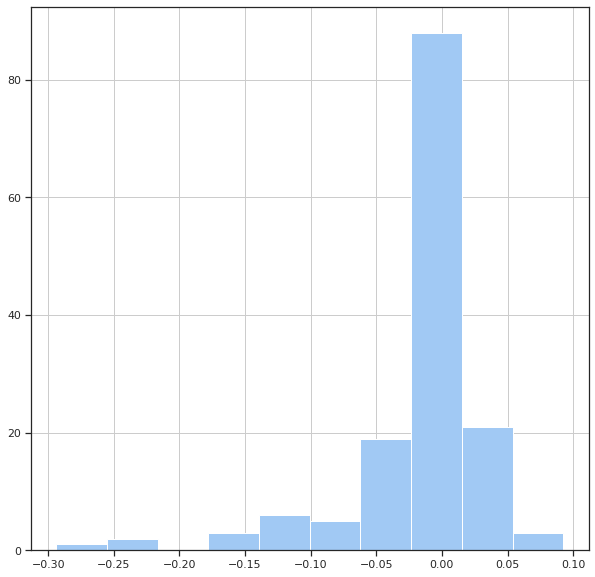

In [17]:
summary['performance gap'].hist(bins=10);

In [21]:
summary['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(10)]).round(2)

count    148.00
mean      -0.02
std        0.05
min       -0.29
0%        -0.29
10%       -0.08
20%       -0.04
30%       -0.02
40%       -0.01
50%        0.00
60%        0.00
70%        0.01
80%        0.01
90%        0.02
max        0.09
Name: performance gap, dtype: float64

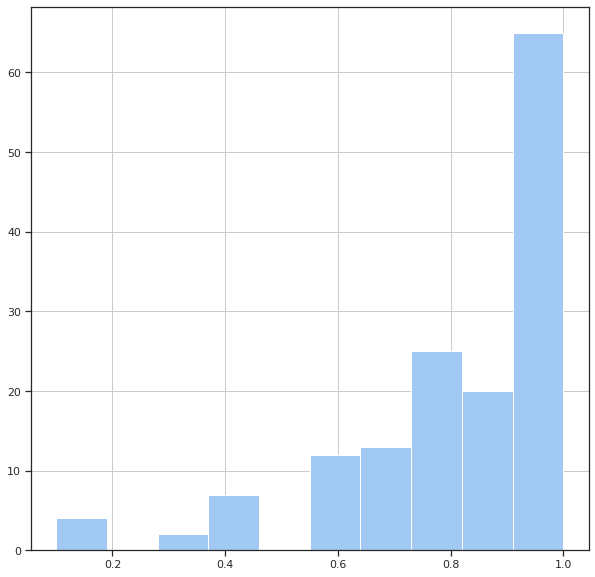

In [19]:
summary['sample'].hist(bins=10);

In [22]:
summary['sample'].astype(float).describe(percentiles=[i*0.1 for i in range(1, 10)]).round(2)

count    148.00
mean       0.81
std        0.21
min        0.10
10%        0.57
20%        0.70
30%        0.75
40%        0.80
50%        0.86
60%        0.92
70%        0.97
80%        0.99
90%        1.00
max        1.00
Name: sample, dtype: float64

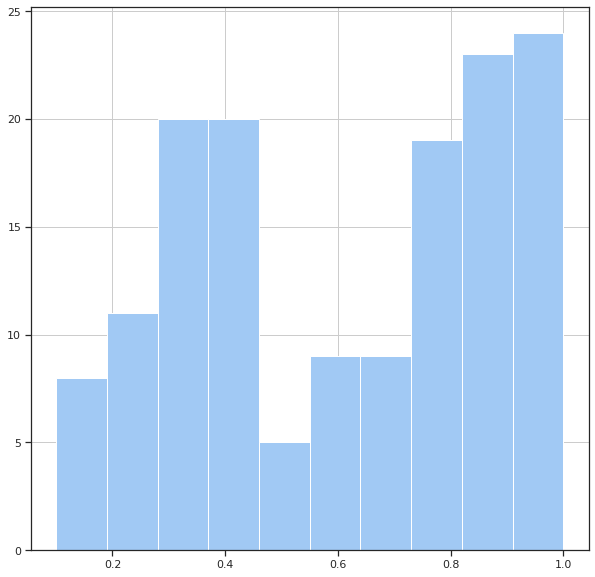

In [20]:
summary['threshold'].hist(bins=10);

In [23]:
summary['threshold'].astype(float).describe(percentiles=[i*0.1 for i in range(1, 10)]).round(2)

count    148.00
mean       0.61
std        0.27
min        0.10
10%        0.25
20%        0.30
30%        0.41
40%        0.49
50%        0.65
60%        0.75
70%        0.85
80%        0.90
90%        0.95
max        1.00
Name: threshold, dtype: float64

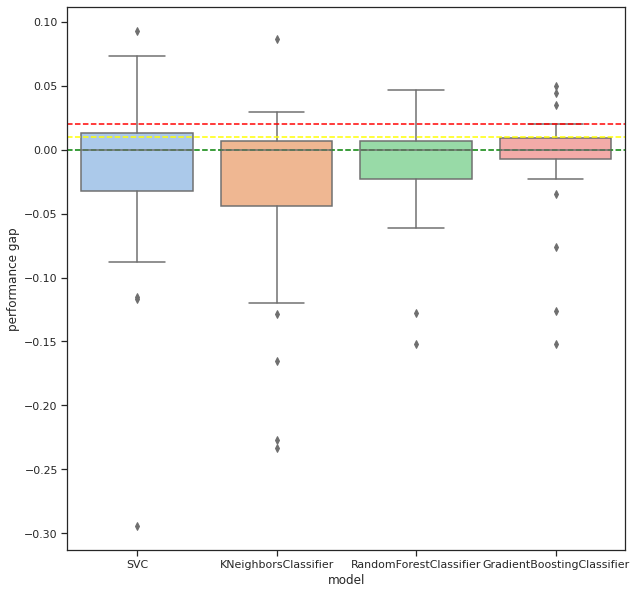

In [10]:
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=summary, x="model", y='performance gap')
plt.axhline(0, ls='--', c='green')
plt.axhline(0.01, ls='--', c='yellow')
# plt.axhline(0.01, ls='--', c='orange')
plt.axhline(0.02, ls='--', c='red')
plt.show()

In [11]:
for model in ['SVC', 'KNeighborsClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier']:
    print(model)
    print(summary[summary.model == model]['performance gap'].astype(float).describe(percentiles=[i*0.1 for i in range(10)]).round(2), '\n')

SVC
count    37.00
mean     -0.02
std       0.06
min      -0.29
0%       -0.29
10%      -0.09
20%      -0.04
30%      -0.02
40%      -0.01
50%       0.00
60%       0.00
70%       0.01
80%       0.02
90%       0.03
max       0.09
Name: performance gap, dtype: float64 

KNeighborsClassifier
count    37.00
mean     -0.03
std       0.07
min      -0.23
0%       -0.23
10%      -0.12
20%      -0.06
30%      -0.03
40%      -0.01
50%      -0.00
60%       0.00
70%       0.00
80%       0.01
90%       0.02
max       0.09
Name: performance gap, dtype: float64 

RandomForestClassifier
count    37.00
mean     -0.01
std       0.04
min      -0.15
0%       -0.15
10%      -0.06
20%      -0.03
30%      -0.02
40%      -0.00
50%       0.00
60%       0.00
70%       0.01
80%       0.01
90%       0.02
max       0.05
Name: performance gap, dtype: float64 

GradientBoostingClassifier
count    37.00
mean     -0.01
std       0.04
min      -0.15
0%       -0.15
10%      -0.03
20%      -0.02
30%      -0.01
40%      -